**Pretrained CNN i.e ResNet-101**
*     **With DropOut Layer(0.5)**
*     **Without DropOut Layer**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Importing Some Basic Libraries**

In [ ]:
# Loading Libraries
import torch 
import torch.nn as nn
import torchvision 
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import torchvision.models as models

import numpy as np
import matplotlib.pyplot as plt

# **Initializing GPU Usage**

In [ ]:
# Model to device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# load the training data
train_data = torchvision.datasets.ImageFolder(root = '../input/100-bird-species/train')

# use np.concatenate to stick all the images together to form a 8200416 X 224 X 3 array
x = np.concatenate([np.asarray(train_data[i][0]) for i in range(len(train_data))])

with open('train_np.npy', 'wb') as f:
    np.save(f, x)

In [ ]:
# load the Validation data
val_data = torchvision.datasets.ImageFolder(root = '../input/100-bird-species/valid')

# use np.concatenate to stick all the images together to form a 291200 X 224 X 3 array
a = np.concatenate([np.asarray(val_data[i][0]) for i in range(len(val_data))])

with open('val_np.npy', 'wb') as f:
    np.save(f, a)

In [ ]:
# load the Testing data
test_data = torchvision.datasets.ImageFolder(root = '../input/100-bird-species/valid')

# use np.concatenate to stick all the images together to form a 291200 X 224 X 3 array
p = np.concatenate([np.asarray(test_data[i][0]) for i in range(len(test_data))])

with open('test_np.npy', 'wb') as f:
    np.save(f, p)

In [ ]:
!zip -r file.zip ./

In [ ]:
from IPython.display import FileLink
FileLink(r'file.zip')

# **Mean & Std For Training Data**

In [ ]:
with open('train_np.npy', 'rb') as f:
    x = np.load(f)

In [ ]:
# print(x)
print(x.shape)

# calculate the mean along the (0, 1) axes
train_mean = np.mean(x, axis=(0, 1))

# the mean
print("Train Mean:-", train_mean)

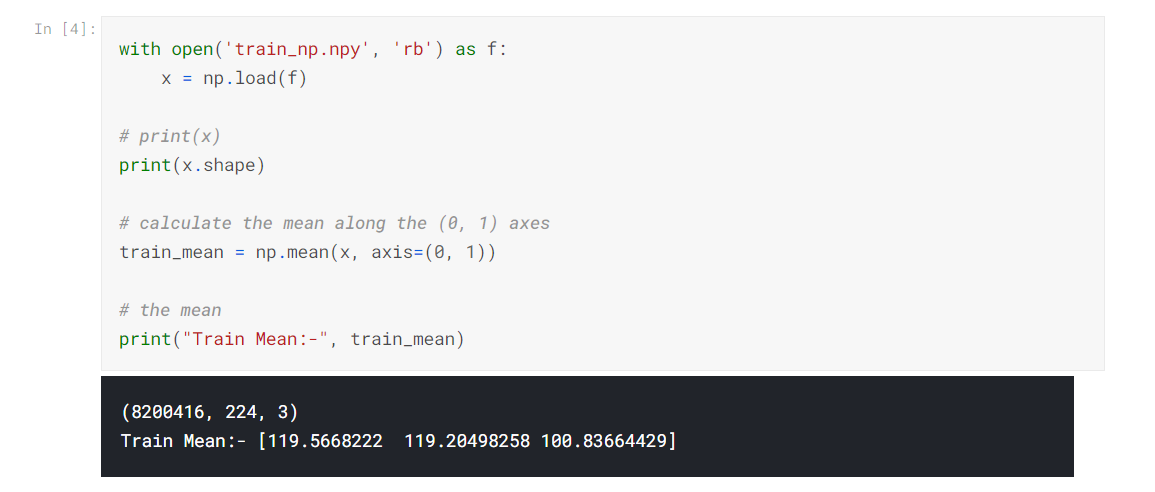

In [ ]:
# calculate the std along the (0, 1) axes
train_std = np.std(x, axis=(0, 1))

# the std
print("Train Std:-", train_std)

**Unfortunately, I am unable to calculate Standard Deviation of Training Data due to limitation of Computational Resource.**

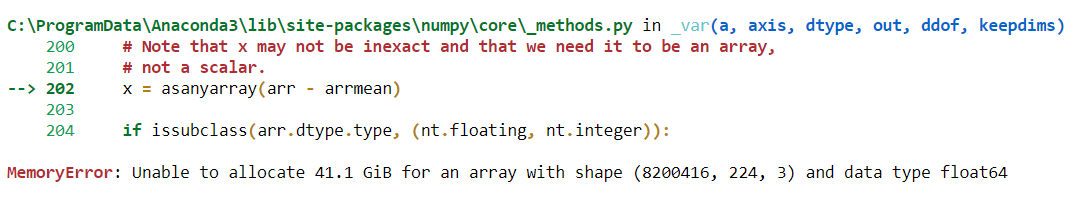

# **Mean & Std For Validation Data**

In [ ]:
with open('val_np.npy', 'rb') as f:
    a = np.load(f)

In [ ]:
# calculate the mean along the (0, 1) axes
val_mean = np.mean(a, axis=(0, 1))


# the mean
print("Val Mean:-", val_mean)

In [ ]:
# calculate the std along the (0, 1) axes
val_std = np.std(a, axis=(0, 1))

# the std
print("Val Std:-", val_std)

**I calculated Mean and Standard deviation for Validation Data in Another File**

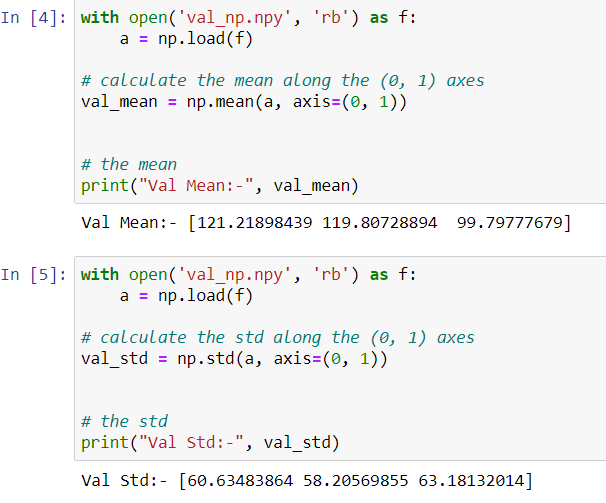

# **Mean & Std For Testing Data**

In [ ]:
with open('test_np.npy', 'rb') as f:
    p = np.load(f)

In [ ]:
# calculate the mean along the (0, 1) axes
test_mean = np.mean(p, axis=(0, 1))


# the mean
print("Test Mean:-", test_mean)

In [ ]:
# calculate the std along the (0, 1) axes
test_std = np.std(p, axis=(0, 1))

# the std
print("Test Std:-", test_std)

# **Transformations and Data Augmentation**

In [ ]:
# Transforming data
IMGSIZE = 224
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(0.2),
                                transforms.ToTensor(),
                                transforms.Resize((IMGSIZE,IMGSIZE))
                                #transforms.Normalize((119.5668222, 119.20498258, 100.83664429),(?, ?, ?))
                               ])


# Loading Data
train_dataset = torchvision.datasets.ImageFolder(root = '../input/100-bird-species/train',
                                           transform = train_transform)


# Print no. of classes
print("No of Classes: ", len(train_dataset.classes))

In [ ]:
# Transforming data
val_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(0.2),
                                transforms.ToTensor(),
                                transforms.Resize((IMGSIZE,IMGSIZE))
                                #transforms.Normalize((121.21898439, 119.80728894, 99.79777679),(60.63483864, 58.20569855, 63.18132014))
                               ])


# Loading Data
val_dataset = torchvision.datasets.ImageFolder(root = '../input/100-bird-species/valid',
                                           transform = val_transform)


# Print no. of classes
print("No of Classes: ", len(val_dataset.classes))

In [ ]:
# Transforming data
test_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(0.2),
                                transforms.ToTensor(),
                                transforms.Resize((IMGSIZE,IMGSIZE))
                                #transforms.Normalize((),())
                               ])


# Loading Data
test_dataset = torchvision.datasets.ImageFolder(root = '../input/100-bird-species/test',
                                           transform = test_transform)


# Print no. of classes
print("No of Classes: ", len(test_dataset.classes))

In [ ]:
num_classes = 260

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = 32, 
                                           shuffle = True)

val_loader = torch.utils.data.DataLoader(dataset = val_dataset,
                                         batch_size = 32, 
                                         shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = 32, 
                                          shuffle = True)

# **ResNet-101**

## **With DropOutLayer(0.5)**

In [ ]:
resnet101 = models.resnet101(pretrained=True)

In [ ]:
print(resnet101)

In [ ]:
q = resnet101.fc.in_features
resnet101.fc = nn.Sequential(
                 nn.Dropout(0.5),
                 nn.Linear(q, num_classes))

resnet101 = resnet101.cuda()

In [ ]:
criter = nn.CrossEntropyLoss()
optimz = torch.optim.Adam(resnet101.parameters(),lr=1e-5,weight_decay=1e-5)

In [ ]:
TrainLoss = []
TrainAcc = []
ValLoss = []
ValAcc = []
num_epochs = 11

In [ ]:
# Train the model
total_step = len(train_loader)

for epoch in range(num_epochs):
    trainAcc = 0
    valAcc = 0
    for i, (images, labels) in enumerate(train_loader):
        resnet101.train()
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = resnet101(images)
        trainloss = criter(outputs, labels)
        
        # Backward and optimize
        optimz.zero_grad()
        trainloss.backward()
        optimz.step()
        
        # Checking accuracy
        preds = outputs.data.max(dim=1,keepdim=True)[1]
        trainAcc += preds.eq(labels.data.view_as(preds)).cpu().sum()
    
    trainAcc = trainAcc/len(train_loader.dataset) * 100
    
    for i, (images, labels) in enumerate(val_loader):
        resnet101.eval()
        images = images.to(device)
        labels = labels.to(device)
    
        # Forward pass
        outputs = resnet101(images)
        valloss = criter(outputs, labels)
    
        # Checking accuracy
        preds = outputs.data.max(dim=1,keepdim=True)[1]
        valAcc += preds.eq(labels.data.view_as(preds)).cpu().sum()
    
    valAcc = valAcc/len(val_loader.dataset) * 100
    
    print("Epoch {} =>  Train Loss : {trainloss:.2f};   Train Accuracy : {trainAcc:.2f}%;   Val Loss : {valloss:.2f};   Val Accuracy : {valAcc:.2f}%".format(epoch+1, trainloss=trainloss.item(), trainAcc=trainAcc, valloss=valloss.item(), valAcc=valAcc))
  
    TrainLoss.append(trainloss)
    TrainAcc.append(trainAcc)

    ValLoss.append(valloss)
    ValAcc.append(valAcc)

In [ ]:
# Save the model checkpoint
torch.save(resnet101.state_dict(), 'resnet101Model.ckpt')

In [ ]:
plt.plot(range(2),TrainAcc)
plt.plot(range(2),ValAcc)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Accuracy of ResNet101")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.show()

In [ ]:
plt.plot(range(2),TrainLoss)
plt.plot(range(2),ValLoss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Loss of ResNet101")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [ ]:
# Test the model

resnet101.eval()  
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        y_pred = []
        Images = images.to(device)
        Labels = labels.to(device)
        outputs = resnet101(Images)
        prediction_array = outputs.data
        
        _, predicted = torch.max(prediction_array, 1)
        y_pred += predicted
        total += Labels.size(0)
        correct += (predicted == Labels).sum().item()
        
    acc = 100 * correct / total
    #Accuracies.append(acc)
    print('Test Accuracy of the ResNet-101 model on the Testing Dataset: {} %'.format(100 * correct / total))

## **Without DropOutLayer**

In [ ]:
resnet101 = models.resnet101(pretrained=True)

In [ ]:
w = resnet101.fc.in_features
resnet101.fc = nn.Linear(w, num_classes)

resnet101 = resnet101.cuda()

In [ ]:
criter = nn.CrossEntropyLoss()
optimz = torch.optim.Adam(resnet101.parameters(),lr=1e-5,weight_decay=1e-5)

In [ ]:
TrainLoss = []
TrainAcc = []
ValLoss = []
ValAcc = []
num_epochs = 2

In [ ]:
# Train the model
total_step = len(train_loader)

for epoch in range(num_epochs):
    trainAcc = 0
    valAcc = 0
    for i, (images, labels) in enumerate(train_loader):
        resnet101.train()
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = resnet101(images)
        trainloss = criter(outputs, labels)
        
        # Backward and optimize
        optimz.zero_grad()
        trainloss.backward()
        optimz.step()
        
        # Checking accuracy
        preds = outputs.data.max(dim=1,keepdim=True)[1]
        trainAcc += preds.eq(labels.data.view_as(preds)).cpu().sum()
    
    trainAcc = trainAcc/len(train_loader.dataset) * 100
    
    for i, (images, labels) in enumerate(val_loader):
        resnet101.eval()
        images = images.to(device)
        labels = labels.to(device)
    
        # Forward pass
        outputs = resnet101(images)
        valloss = criter(outputs, labels)
    
        # Checking accuracy
        preds = outputs.data.max(dim=1,keepdim=True)[1]
        valAcc += preds.eq(labels.data.view_as(preds)).cpu().sum()
    
    valAcc = valAcc/len(val_loader.dataset) * 100
    
    print("Epoch {} =>  Train Loss : {trainloss:.2f};   Train Accuracy : {trainAcc:.2f}%;   Val Loss : {valloss:.2f};   Val Accuracy : {valAcc:.2f}%".format(epoch+1, trainloss=trainloss.item(), trainAcc=trainAcc, valloss=valloss.item(), valAcc=valAcc))
  
    TrainLoss.append(trainloss)
    TrainAcc.append(trainAcc)

    ValLoss.append(valloss)
    ValAcc.append(valAcc)

In [ ]:
plt.plot(range(2),TrainAcc)
plt.plot(range(2),ValAcc)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Accuracy of ResNet101 without DropOut Layer")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.show()

In [ ]:
plt.plot(range(2),TrainLoss)
plt.plot(range(2),ValLoss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Loss of ResNet101 without DropOut Layer")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [ ]:
# Test the model

resnet101.eval()  
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        y_pred = []
        Images = images.to(device)
        Labels = labels.to(device)
        outputs = resnet101(Images)
        prediction_array = outputs.data
        
        _, predicted = torch.max(prediction_array, 1)
        y_pred += predicted
        total += Labels.size(0)
        correct += (predicted == Labels).sum().item()
        
    acc = 100 * correct / total
    #Accuracies.append(acc)
    print('Test Accuracy of the ResNet-101 model on the Testing Dataset: {} %'.format(100 * correct / total))